<a href="https://colab.research.google.com/github/Lud-lud/text_mining_sentiment_analysis_NLP/blob/main/text_mining_sentiment_analysis_portuguese_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de sentimentos de um produto vendido em e-commerce
Neste projeto, foram analisados os comentários dos clientes de uma mochila vendida no Mercado Livre.

**Análise descritiva**

A partir de uma base de dados de comentários disponível no [Kaggle](https://www.kaggle.com/datasets/sampaiovitor/avaliaes-em-portugus-amazon-e-mercado-livre), foi realizada a extração dos tokens, a remoção das stopwords e dos caracteres numéricos e a produção de nuvens de palavras e gráficos para análise da frequência dos sentimentos positivos e negativos.

Além disso, foi criado um índice para mensurar o sentimento geral dos clientes em relação ao produto.

A análise descritiva é útil para dar uma visão geral dos sentimentos utilizando métodos simples.

**Análise preditiva**

A partir de bases de dados de comentários de produtos no site Buscapé disponíveis neste [repositório](https://github.com/lucasvbalves/nlp-pt-br-datasets?utm_source=chatgpt.com), foi treinado um modelo de classificação de comentários baseado no algoritmo Naive-Bayes, uma das técnicas de Processamento de Linguagem Natural mais antigas.

Com este modelo, os comentários sobre a mochila foram classificados e uma breve análise da quantidade de acertos foi realizada.

A aplicação deste algoritmo pode ser útil para filtragem de comentários com base na polaridade. Tal estratégia é utilizada em grandes marketplaces, como a Amazon. Veja este exemplo para um hidratante corporal:
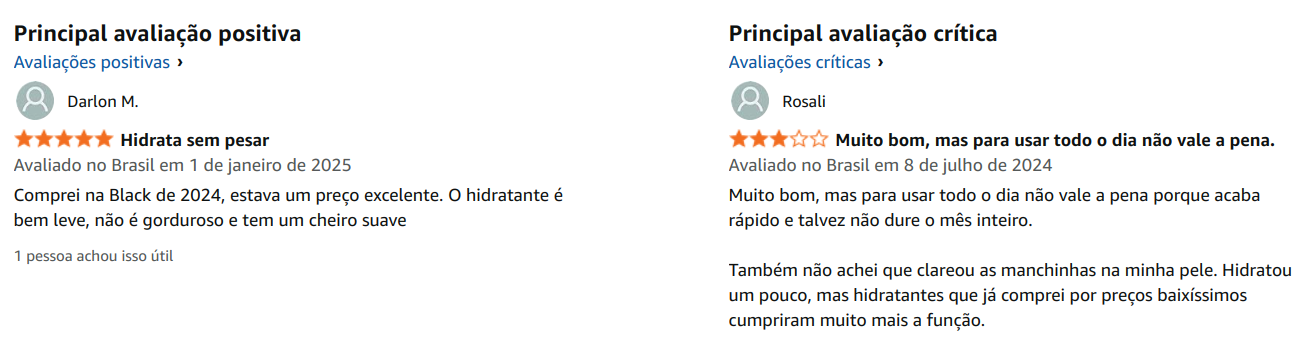



In [144]:
install.packages("tidyverse") # Instalar pacote necessário para a manipulação dos dados
install.packages("tidytext") # Instalar pacote necessário para criar tokens a partir dos comentários
install.packages("stopwords") # Instalar pacote necessário para criar tokens a partir dos comentários
install.packages("wordcloud") # Instalar pacote necessário para criar nuvem de palavras
install.packages("reshape2") # Instalar pacote que produz nuvem de palavras para diferentes categorias
install.packages("tm") # Instalar pacote que a criação do corpus para o modelo preditivo
install.packages("e1071") # Instalar pacote que treina o modelo Naive Bayes
install.packages("caret") # Instalar pacote que faz matriz de confusão

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [95]:
# Carregar os pacotes necessários
library("tidyverse")
library("tidytext")
library("stopwords")
library("wordcloud")
library("reshape2")
library("tm")
library("e1071")
library("caret")

In [96]:
# Obter os dados e visualizar as primeiras linhas da tabela
df <- read_csv('/content/ml_scrape_final.csv', show_col_types = FALSE)
head(df)

Pesquisa,Titulo,Link,Comentario
<chr>,<chr>,<chr>,<chr>
smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb Preto 4gb Ram,https://produto.mercadolivre.com.br/MLB-3315181641-smartphone-samsung-galaxy-a14-dual-66-128gb-preto-4gb-ram-_JM#position=46&search_layout=stack&type=item&tracking_id=4703b69b-1b0f-4cc2-b281-a641f81b3281,A foto fica amarelada quando eu vou fotografar com celular.
smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb Preto 4gb Ram,https://produto.mercadolivre.com.br/MLB-3315181641-smartphone-samsung-galaxy-a14-dual-66-128gb-preto-4gb-ram-_JM#position=46&search_layout=stack&type=item&tracking_id=4703b69b-1b0f-4cc2-b281-a641f81b3281,👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼.
smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb Preto 4gb Ram,https://produto.mercadolivre.com.br/MLB-3315181641-smartphone-samsung-galaxy-a14-dual-66-128gb-preto-4gb-ram-_JM#position=46&search_layout=stack&type=item&tracking_id=4703b69b-1b0f-4cc2-b281-a641f81b3281,Muito bom.
smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb Preto 4gb Ram,https://produto.mercadolivre.com.br/MLB-3315181641-smartphone-samsung-galaxy-a14-dual-66-128gb-preto-4gb-ram-_JM#position=46&search_layout=stack&type=item&tracking_id=4703b69b-1b0f-4cc2-b281-a641f81b3281,Produto muito bom dei de presente pra meu filho ele tá amando só esperava vir ao menos com o fone de ouvido mais não veio mais do resto perfeito.
smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb Preto 4gb Ram,https://produto.mercadolivre.com.br/MLB-3315181641-smartphone-samsung-galaxy-a14-dual-66-128gb-preto-4gb-ram-_JM#position=46&search_layout=stack&type=item&tracking_id=4703b69b-1b0f-4cc2-b281-a641f81b3281,Recomendo.
smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb Preto 4gb Ram,https://produto.mercadolivre.com.br/MLB-3315181641-smartphone-samsung-galaxy-a14-dual-66-128gb-preto-4gb-ram-_JM#position=46&search_layout=stack&type=item&tracking_id=4703b69b-1b0f-4cc2-b281-a641f81b3281,"Maravilhoso, potência perfeita em questão do preço!."


In [97]:
# Verificar quantos produtos diferentes há na base de dados
df %>% summarize(n_produtos = n_distinct(Titulo))

n_produtos
<int>
896


In [98]:
# Verificar quais os produtos com maior número de comentários
freq <- df %>% count(Titulo) %>% arrange(desc(n))
head(freq, 5)

Titulo,n
<chr>,<int>
Mochila Masculina Faculdade Impermeável Resistente Grande,700
Umidificador De Ar Aromatizador Purificador Portátil Led Rgb,428
Kit Com 3 Camisa Gola Polo Marine Em Malha Piquet Camiseta,404
Relógio Smartwatch Android Ios Inteligente D20 Bluetooth Nfe,401
5 Camiseta Masculina Camisas Slim Voker 100% Algodão Atacado,396


In [99]:
# Selecionar produto com maior número de comentários para termos o máximo de dados possível
coment_prod <- df %>% filter(Titulo == 'Mochila Masculina Faculdade Impermeável Resistente Grande') %>% select(Comentario)

In [100]:
# Obter link do produto para visualizá-lo
link <- df %>% filter (Titulo == 'Mochila Masculina Faculdade Impermeável Resistente Grande')
print(link$Link[1])

[1] "https://produto.mercadolivre.com.br/MLB-1778741590-mochila-masculina-faculdade-impermeavel-resistente-grande-_JM#position=5&search_layout=grid&type=item&tracking_id=8ce73190-a8fa-4de3-985e-6ef8f6e62f97"


In [101]:
# Verificar se já está no formato tibble
str(coment_prod)

tibble [700 × 1] (S3: tbl_df/tbl/data.frame)
 $ Comentario: chr [1:700] "Bom dia, não gostei do que comprei, vcs mostra no encarte uma coisa e manda outra. Dessa mochila aqui eu compro"| __truncated__ "Péssima.\nNunca comprei uma mochila tão ruim, e de péssima qualidade igual essa! menos de dois meses de uso est"| __truncated__ "Bom dia, não gostei da mochila material péssimo, já está descosturando em várias partes da mochila,pelo o valor"| __truncated__ "As alças não viram conforme a foto, vira com apenas uma costura e sem o acolchoado, para carregar com peso fica"| __truncated__ ...


In [102]:
# Visualizar alguns comentários
head(coment_prod)

Comentario
<chr>
"Bom dia, não gostei do que comprei, vcs mostra no encarte uma coisa e manda outra. Dessa mochila aqui eu compro por 40,00 reais não gostei é um produto de péssima qualidade. Só não vou devolver porquê meu filho tá precisando. Pelo valor que eu paguei era por um produto de boa qualidade e não esse que vc me mandou."
"Péssima. Nunca comprei uma mochila tão ruim, e de péssima qualidade igual essa! menos de dois meses de uso está desmanchando toda, descascando tudo por dentro, as costuras soltando, decepcionada com o produto. Não tem nada a ver com a propaganda que fazem, não é a mesma mochila, dinheiro jogado fora é ainda comprei duas. Querem uma mochila descartável pode comprar essa."
"Bom dia, não gostei da mochila material péssimo, já está descosturando em várias partes da mochila,pelo o valor achei que o produto teria uma qualidade boa,ontem já levei pro sapateiro da uma reforçada nas costuras, além do valor pago vou desembolsar mais 20 reais pra consertar."
"As alças não viram conforme a foto, vira com apenas uma costura e sem o acolchoado, para carregar com peso fica bem desconfortável sem o acolchoado nas alças, a parte interna não veio conforme a foto, não tem o elástico que prende o notebook. Material até parece ter qualidade mas as alças não dão segurança que vai aguentar."
"Nossa super decepcionada com a mercadoria meu filho não usou nem uma semana já tive que reforça a custura,sem contar que zíper já estragou,a mochila aparentemente parece ser resistente, mas a custura de péssima qualidade. A mochila já está encostada aqui,foi um dinheiro jogado fora."
"A mochila bem frágil rasgou muito rápido, menos de um mês de uso a forração por dentro ,no bolso da lateral também tive que costurar para poder usar mais um pouquinho e ela toda mole bem difícil de manusear o sippers ,eu comprei mas não recomendo comprar e não comprarei de novo essa mochila."


In [103]:
# Realizar mineração do texto (obtenção de tokens)
coment_prod_tokens <- coment_prod %>%
                        unnest_tokens(word, Comentario) %>% # Extrair tokens
                        filter(!grepl('[0-9]', word)) # Remover números

# Caso queira remover emojis:
#filter(!grepl('[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]', word)) # Remover emojis

In [104]:
# Visualizar algumas stopwords
head(get_stopwords(language = 'pt'), 10)

word,lexicon
<chr>,<chr>
de,snowball
a,snowball
o,snowball
que,snowball
e,snowball
do,snowball
da,snowball
em,snowball
um,snowball


In [105]:
# Remover stopwords
coment_prod_tokens <- coment_prod_tokens %>% anti_join(get_stopwords(language = 'pt'))

Joining with `by = join_by(word)`


In [106]:
# Visualizar resultado da remoção das stopwords
head(coment_prod_tokens, 10)

word
<chr>
bom
dia
gostei
comprei
vcs
mostra
encarte
coisa
manda


In [107]:
# Obter o número de vezes que cada palavra ocorreu e visualizar o resultado
cont_palav <- coment_prod_tokens %>% count(word, sort = T)
head(cont_palav, 20)

word,n
<chr>,<int>
é,177
produto,160
mochila,150
qualidade,121
material,97
uso,93
bom,89
boa,76
recomendo,72


In [108]:
# Definir paleta de cores para a nuvem de palavras
pal <- brewer.pal(8,"Dark2")

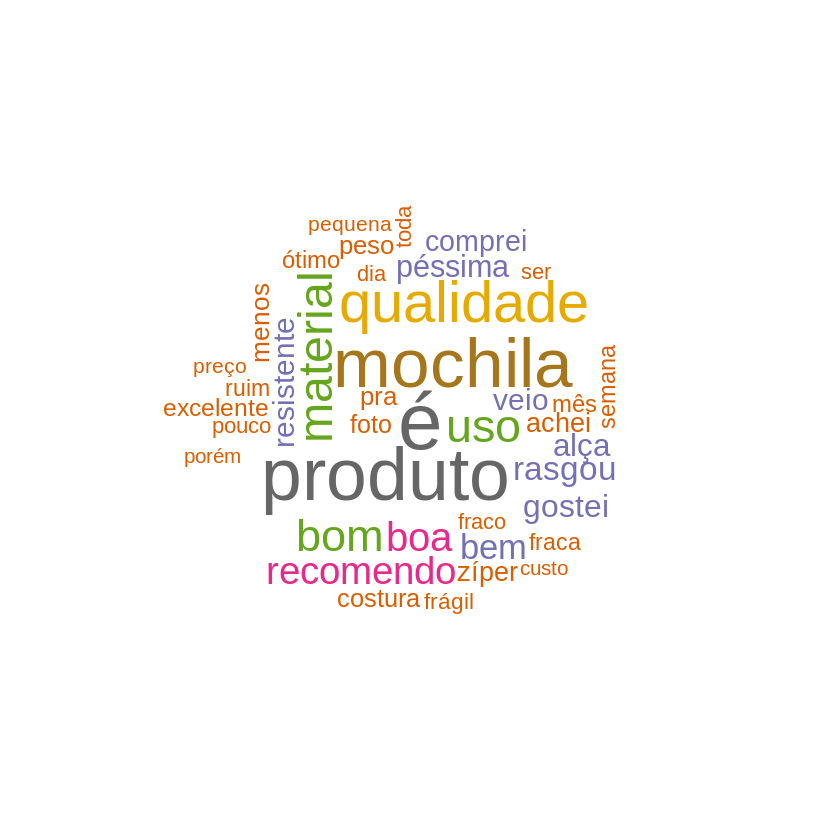

In [109]:
# Criar nuvem de palavras
cont_palav %>% with(wordcloud(word, n, random.order = FALSE, max.words = 40, colors=pal))

Nesta primeira análise, observa-se que as palavras por si só não trazem uma informação precisa, pois muitas delas precisam de outras palavras para ter sentido. Por exemplo, a palavra "qualidade" pode estar associada tanto a "boa" quanto a "péssima", duas palavras que também foram frequentes. No entanto, ainda sim a análise nos dá algumas informações que têm valores negativos, como "ruim", "feio" e "fraco".

## Análise de sentimentos com tokens combinados com a palavra "não"
A palavra "não" é uma stopword e por isso foi removida automaticamente da análise anterior. No entanto, é importante considerá-la, pois ela muda completamente o significado de um token. Por isso, vamos avaliar a frequência de negação dos tokens mais comuns nas análise anterior.

In [110]:
# Selecionar apenas comentários que contém a palavra "não"
coment_cont_nao <- coment_prod %>% filter(str_detect(Comentario, "não"))
nrow(coment_cont_nao)

[1] 169

O procedimento anterior foi realizado para reduzir o volume de dados processado, afinal, não nos interessa processar comentários sem a palavra não neste momento. Dos 700 comentários, restaram apenas 169.

In [111]:
# Extrair tokens bigramas
coment_prod_tokens_bigr <- coment_cont_nao %>%
                            unnest_tokens(word, Comentario, token = "ngrams", n = 2) %>%
                            filter(!grepl('[0-9]', word)) # Remove números

#filter(!grepl('[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]', word))

In [112]:
# Visualizar resultado da extração dos tokens bigramas
head(coment_prod_tokens_bigr, 10)

word
<chr>
bom dia
dia não
não gostei
gostei do
do que
que comprei
comprei vcs
vcs mostra
mostra no


Aqui já vemos que quando a palavra "não" aparece após o token, este não apresenta um significado lógico. Por isso, vamos extrair apenas tokens que contenham a palavra "não" no começo.

In [113]:
# Obter apenas tokens que começam com a palavra "não"
coment_neg <- coment_prod_tokens_bigr %>% filter(str_detect(word, "^não"))

head(coment_neg, 10)

word
<chr>
não gostei
não gostei
não vou
não esse
não tem
não é
não gostei
não viram
não veio


In [114]:
# Contar a frequência de ocorrência dos bigramas
cont_bigr <- coment_neg %>% count(word, sort = T)
head(cont_bigr)

word,n
<chr>,<int>
não é,37
não recomendo,29
não tem,23
não gostei,14
não aguenta,7
não veio,7


Anteriormente, a palavra "recomendo" apareceu 72 vezes. Agora, vemos que 29 ocorrências da palavra "recomendo" estão associadas a palavra "não".

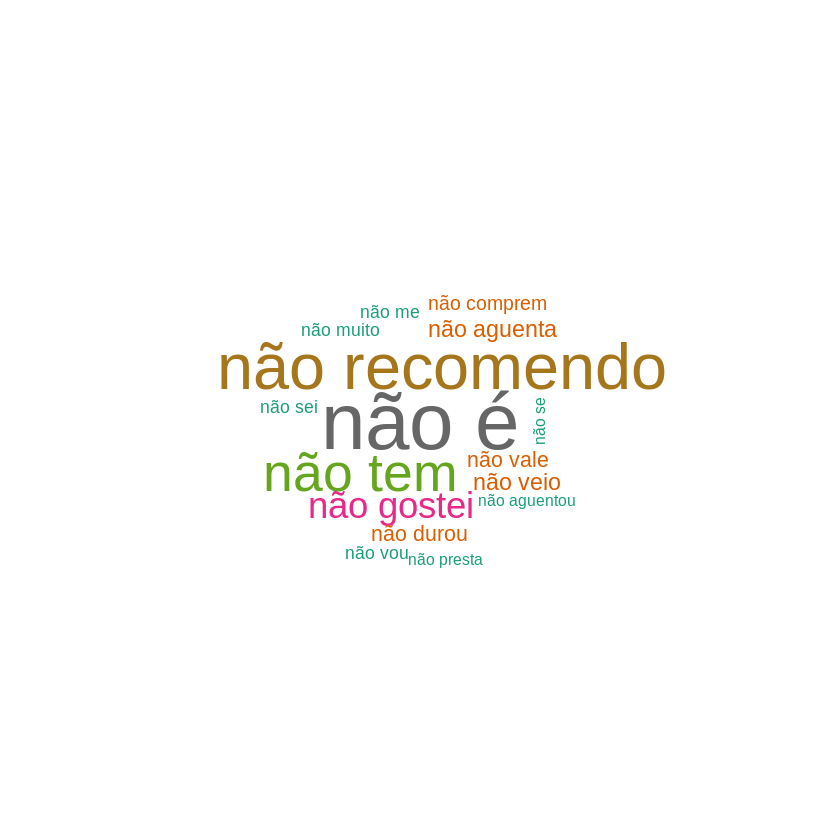

In [115]:
# Criar a nuvem de palabras com os bigramas
cont_bigr %>% with(wordcloud(word, n, random.order = FALSE, max.words = 50, colors=pal))

Vamos visualizar a proporção das vezes em que os tokens mais frequentes vistos na primeira nuvem de palavras tinham significado negativo.

In [116]:
cont_bigr_tokens <- cont_bigr %>%
  unnest_tokens(tokens, word) %>%
  filter(tokens != "não") %>%
  rename(n_neg = n) %>%
  inner_join(cont_palav, by = c("tokens" = "word")) %>%
  arrange(desc(n))  %>%
  select(tokens, n, n_neg)
head(cont_bigr_tokens, 10)
nrow(cont_bigr_tokens)

tokens,n,n_neg
<chr>,<int>,<int>
é,177,37
mochila,150,1
recomendo,72,29
gostei,55,14
veio,50,7
parece,24,2
vale,21,6
vou,17,4
usei,15,2


[1] 82

In [117]:
# Preparar dados para construir gráfico de barras empilhadas
dados_long <- cont_bigr_tokens[1:10,] %>%
  pivot_longer(cols = c(n_neg, n), names_to = "Tipo", values_to = "Valor") # Transformar os dados para formato longo

head(dados_long)

# Calcular a frequência relativa por token
percentual <- dados_long %>%
                group_by(tokens) %>%
                mutate(Perc = Valor / sum(Valor) * 100)

tokens,Tipo,Valor
<chr>,<chr>,<int>
é,n_neg,37
é,n,177
mochila,n_neg,1
mochila,n,150
recomendo,n_neg,29
recomendo,n,72


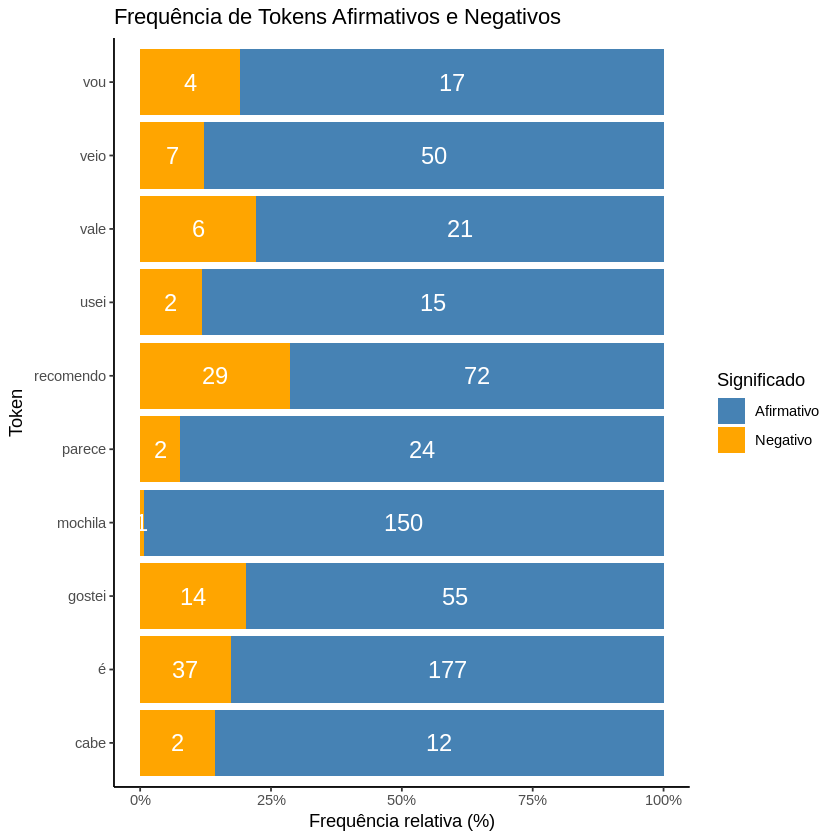

In [118]:
# Gráfico de barras empilhadas com rótulos centralizados
ggplot(percentual, aes(x = tokens, y = Perc, fill = Tipo)) +
  geom_bar(stat = "identity", position = "stack") +  # Barras empilhadas
  geom_text(aes(label = Valor),
            position = position_stack(vjust = 0.5),  # Centraliza os rótulos
            size = 5,
            color = "white") +                      # Cor do texto
  coord_flip() +                                    # Inverte os eixos
  scale_fill_manual(
    labels = c("n" = "Afirmativo", "n_neg" = "Negativo"),
    values = c("n" = "steelblue", "n_neg" = "orange")
  ) +
  labs(title = "Frequência de Tokens Afirmativos e Negativos",
       x = "Token",
       y = "Frequência relativa (%)",
       fill = "Significado") +
  theme_classic() +
  scale_y_continuous(labels = scales::percent_format(scale = 1)) # Formato de porcentagem


Observa-se pelo gráfico que a maioria dos tokens mais frequentes são, de fato, afirmativos. Agora, veremos quais palavras mais caracterizam os sentimentos positivos e negativos em relação ao produto com base nos comentários.
Primeiramente, vamos classificar os tokens em positivos, negativos ou neutros de acordo com um dicionário de sentimentos.

In [119]:
# Adicionar dicionário de sentimentos em Português
# https://b2find.eudat.eu/dataset/b6bd16c2-a8ab-598f-be41-1e7aeecd60d3
# https://b2share.eudat.eu/records/93ab120efdaa4662baec6adee8e7585f
dicio <- read.delim("/content/SentiLex-lem-PT02.txt", sep = ";", stringsAsFactors = FALSE, header = FALSE)
head(dicio, 5)

,V1,V2,V3,V4
,<chr>,<chr>,<chr>,<chr>
1,à-vontade.PoS=N,TG=HUM:N0,POL:N0=1,ANOT=MAN
2,abafado.PoS=Adj,TG=HUM:N0,POL:N0=-1,ANOT=JALC
3,abafante.PoS=Adj,TG=HUM:N0,POL:N0=-1,ANOT=MAN
4,abaixado.PoS=Adj,TG=HUM:N0,POL:N0=-1,ANOT=JALC
5,abalado.PoS=Adj,TG=HUM:N0,POL:N0=-1,ANOT=JALC


In [120]:
# Editar dicionário para que seja possível fazer uniões
dicio <- dicio %>%
  select(V1, V3) %>%
  mutate(V1 = str_extract(V1, "^[^\\.]*")) %>%
  mutate (V3 = str_extract(V3, "(?<=\\=).*")) %>%
  rename(word = V1, polar = V3)
head(dicio, 5)

,word,polar
,<chr>,<chr>
1,à-vontade,1
2,abafado,-1
3,abafante,-1
4,abaixado,-1
5,abalado,-1


In [121]:
# Retirar comentários que contém a palavra "não" para evitar confusão na interpretação da frequência das palavras
coment_prod_tokens <- coment_prod %>%
                        filter(!str_detect(Comentario, "não")) %>%
                        unnest_tokens(word, "Comentario") %>%
                        anti_join(get_stopwords(language = 'pt'))

Joining with `by = join_by(word)`


In [122]:
# Associar um sentimento a cada token
sentim <- coment_prod_tokens %>% inner_join(dicio, by = "word", relationship =
  "many-to-many")

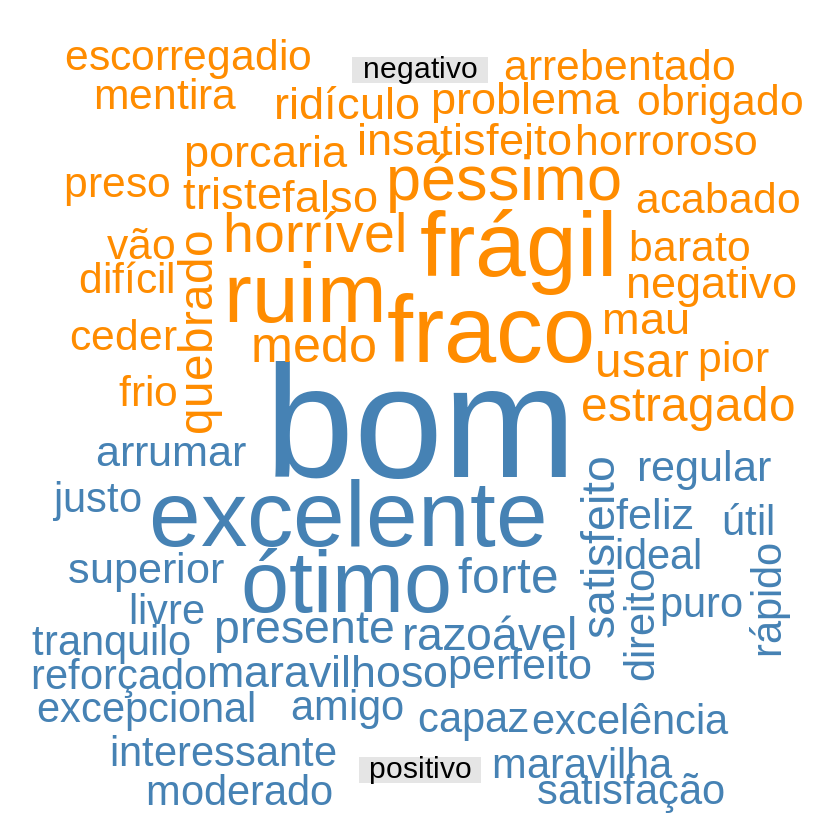

In [123]:
# Criar nuvem de palavras
sentim <- sentim %>% filter(polar != 0) %>% # retirar sentimentos neutros
    mutate(sentim_pos_neg = ifelse(polar==-1,"negativo","positivo"))

suppressWarnings({sentim %>%
  count(word, sentim_pos_neg, sort = TRUE) %>%
  acast(word ~ sentim_pos_neg, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("darkorange", "steelblue"),
                   scale = c(8, 2),
                   max.words = 100,
                   title.size = 1.5)
})

Na nuvem de palavas acima, algumas palavras não fazem sentido neste contexto, como "amigo", "arrumar", "vão", "usar", "regular" e "direito", mas a grande maioria das palavras refletem uma opinião sobre o produto.

Visualmente, percebe-se uma divisão equalitária entre os grupos, com uma tendência maior para a opinião positiva, dado que a palavra "bom" é a maior de todas, ou seja, está em maior proporção.

Para termos uma visão geral dos sentimentos associados ao produto, podemos utilizar uma abordagem quantitativa, a qual utiliza os pesos atribuídos aos sentimentos negativos (-1) e positivos (1).

In [124]:
# Realizar análise exploratória dos sentimentos sobre o produto
sentim_dist <- sentim %>% distinct(word, .keep_all = TRUE)
print(paste("Número total de sentimentos distintos: ", nrow(sentim_dist)))
print(paste("Número de sentimentos distintos positivos: ", sum(sentim_dist$polar == 1)))
print(paste("Número de ocorrências de sentimentos positivos: ", sum(sentim$polar == 1)))
print(paste("Número de sentimentos distintos negativos: ", sum(sentim_dist$polar == -1)))
print(paste("Número de ocorrências de sentimentos negativos: ", sum(sentim$polar == -1)))

[1] "Número total de sentimentos distintos:  67"
[1] "Número de sentimentos distintos positivos:  34"
[1] "Número de ocorrências de sentimentos positivos:  189"
[1] "Número de sentimentos distintos negativos:  33"
[1] "Número de ocorrências de sentimentos negativos:  118"


In [125]:
# Somar o vetor de sentimentos
sentim_geral <- sum(as.numeric(sentim$polar))
sentim_geral

[1] 71

O resultado indica que houve 71 ocorrências de sentimentos positivos a mais do que negativos, o que indica um sentimento geral positivo nos comentários sobre o produto. Podemos criar um índice para termos ideia de quão negativo esse resultado é dividindo-o pelo número total de sentimentos positivos e negativos.
Este índica vai de -1 a 1, sendo que o sinal indica a polaridade de sentimento predominante e quanto mais próximo o valor estiver dos extremos, maior é a proporção de sentimentos desta polaridade em relação aos sentimentos da polaridade oposta. Valores próximos de zero indicam que a proporção entre sentimentos opostos é similar.

In [126]:
sentim_geral_index <- sentim_geral/sum(abs(as.numeric(sentim$polar)))
sentim_geral_index

[1] 0.2312704

Observa-se pelo resultado de sentim_geral_index que há uma sentimento geral positivo fraco, pois o valor é mais próximo de 0 do que de 1. Ou seja, os sentimentos positivos e negativos estão ligeiramente equilibrados. O ideal era que o valor fosse mais próximo de 1, pois isso indicaria maior satisfação dos clientes em relação ao produto.

A análise mostra que parte dos clientes demonstra uma boa impressão sobre o produo após a compra, mas outra parte apresenta opinião negativa que está associada à baixa resistência do produto verificada após o uso.

O anúncio alega que várias estrutaras da mochila são reforçadas, no entanto, clientes relataram que o produto danificou, o que foi expresso em adjetivos como "estragado" e "arrebentado". Clientes mencionaram estar "tristes" e "insatisfeitos" com o produto, possivelmente em decorrência do dano observado.

# Modelo de classificação Naive Bayes

Foi utilizado um corpus de sentimentos, os quais foram classificados em positivos ou negativos.

Os critérios para classificação foram:
* Positivo: acima de 3 estrelas
* Negativo: abaixo de 3 estrelas

É importante ressaltar que é comum que algumas pessoas expressem uma opinião que não condiz com o número de estrelas que elas selecionam (susponhamos que seja por falta de atenção). Portanto, sempre que possível, deve-se utilizar um corpus que seja revisado (visualmente ou com ajuda de IA) para que haja coerência entre o comentário e o sentimento expresso por ele.



In [127]:
# Preparar base de comentários negativos
busc_neg = read.table("/content/buscape_pt_neg.txt", header = F, sep = "\t")
busc_neg["sentimento"] <- "Negativo"
names(busc_neg)[1] <- "texto"
str(busc_neg)
head(busc_neg)

'data.frame':	500 obs. of  2 variables:
 $ texto     : chr  "Quando eu comprei o aparelho ele era um otimo custo-beneficio, porém, hoje ele é encontrado por 500 reais em mu"| __truncated__ "não é tão rápido quanto esperava que fosse. o sistema é muito limitado e impondo limitação ao usuário, não perm"| __truncated__ "A semana passda dia 17/05 adiquiri um dm4 2035br vei com defeito nao se conectava a internet depois de utilisar"| __truncated__ "estamos lavando louça na pia da cozinha, com uma máquina novinha em folha bem ali do lado, totalmente inútil. a"| __truncated__ ...
 $ sentimento: chr  "Negativo" "Negativo" "Negativo" "Negativo" ...


,texto,sentimento
,<chr>,<chr>
1,"Quando eu comprei o aparelho ele era um otimo custo-beneficio, porém, hoje ele é encontrado por 500 reais em muitas lojas, e com esse valor é possivel comprar aparelhos melhores, como o xperia mini, porém, o tamanho da sua tela agrada para um aparelho dessa faixa de preço, a sua memoria ram é de 512mb, e permite a execução de varios aplicativos ao mesmo tempo, seu processador tambem não faz feio, muito menos sua gpu, que é uma adreno 205, a mesma utilizada pelo xperia play. Outro ponto em que o aparelho não peca é na durabilidade da bateria, pelo fato de ser uma bateria de 1540 mah, que chega a durar 2 dias de uso moderado. Mas sua câmera apesar de ter 5mpx não é das melhores e quanto ao flash LED, não espere que ele faça milagre, pois quando ativado parece piorar a qualidade da imagem mais ainda, outro fato de encomoda é a falta de respeito por parte da motorola quanto à atualização do android, que se quer se pronunciou sobre o spice xt531, e o aparelho continua com o android 2.3, enquanto ja existe o android 4.1. O que gostei: Bateria de alta durabilidade, 512mb de memoria ram, Design bonito, acabamento traseiro de qualidade, câmera frontal. O que não gostei: Sem atualização para o android 4.0, Câmera ruim, Tela de baixa qualidade.",Negativo
2,"não é tão rápido quanto esperava que fosse. o sistema é muito limitado e impondo limitação ao usuário, não permitindo criar grupo de trabalho, não permitindo instalar alguns programas que são excensiais para meu trabalho. Por conta disso perdi todo o historico da minha vida e todos os documentos de anos de trabalho, pois o disco do win7 que veio com ele formata o pc sem nenhuma interação com o usuario, basta colocar o disco do drive. O monitor veio com uma faixa vertical na imagem e ate hoje não consegui que a dell resolvesse esse problema. Já cansei de entrar em contato e enviar a nota fiscal por email sem que alguem responda. O que gostei: teclado bom; O que não gostei: monitor e win 7",Negativo
3,"A semana passda dia 17/05 adiquiri um dm4 2035br vei com defeito nao se conectava a internet depois de utilisar toda sua tecnologia de conectidade devolvi para carrefour. Comprei um dm4 2155br dia 24/05 e esta com o mesmo problema falha na conectividade, estou esperando um tecno de nivel avançado da hp que ira me ligar dia 28/05 para tentar resolver se nao resolver irei devolver mais um notebook da hp, em uma semana serao dois.So para completar o rotiador aqui de casa nao é o problema pois é muito bom, ha um xbox 360, uma tv smart, malestone 3 , um positivo sim, cce, sony vaio e hp velho que se conecta ao rotiador perfeitamente. O que gostei: A tecnologia que ha nele widi para se conecta a tv sem fio atraves do rotiador netgear push2tv que tenho e o designer dele. O que não gostei: Tudo, ter dois notebook da hp da linha dm4 2035 e 2155 em uma semana,que nao se conecta a internet e nao se pode usar toda sua tecnologia, o pior é que o pessoal da hp nao sabe o que houve com os dois.",Negativo
4,"estamos lavando louça na pia da cozinha, com uma máquina novinha em folha bem ali do lado, totalmente inútil. a assistência técnica, que é parte do produto, não funcionou no nosso caso. depois de inúmeros telefonemmas, idas e vindas, os técnicos não reconhecem o defeito porque não conseguem reproduzi-lo. na verdade, não possuem equipamento adequado para diagnóstico de defeitos. quando ligamos a máquina, a louça sai ainda suja e muito úmida. não sabemos o que fazer. o fabricante, contactado várias vezes, não oferece soluções. O que gostei: infelizmente, nenhum. a máquina ainda não funcionou adequadamente. O que não gostei: a máquina falha na sua função principal: não lava a louça adequadamente.",Negativo
5,"Péeeeeeessimooooooo odiei o produto estou com ele a um ano e ainda estou com ele na força, uma dica n comprem essa porcaria de celular!!!! a bateria descarrega muito rápido, o design é ultrapassado, é muito caro pra nada, a tela e horrível de se mexer as funções sã

In [128]:
# Preparar base de comentários positivos
busc_pos = read.table("/content/buscape_pt_pos.txt", header = F, sep = "\t")
busc_pos["sentimento"] <- "Positivo"
names(busc_pos)[1] <- "texto"
str(busc_pos)
head(busc_pos)

'data.frame':	415 obs. of  2 variables:
 $ texto     : chr  "Não tenho uma opinião negativa. Quando tiver venho aqui escrever! O que gostei: Avaliação da T4I. Eu particular"| __truncated__ "Este produto é realmente incrível! Além das funções ele possui Android 4.1 (o mais avançado) e é garantida a at"| __truncated__ "Além da excelente qualidade de imagem/som e de todos os recursos, os brindes e as demais vantagens que qualquer"| __truncated__ "O produto é excelente, quem puder comprar compre direto com a Kikos é melhor! O que gostei: A esteira é excelen"| __truncated__ ...
 $ sentimento: chr  "Positivo" "Positivo" "Positivo" "Positivo" ...


,texto,sentimento
,<chr>,<chr>
1,"Não tenho uma opinião negativa. Quando tiver venho aqui escrever! O que gostei: Avaliação da T4I. Eu particularmente casei com esta câmera. Principais mudanças que percebi a anterior (T3i) foram: Tela touch - Otimo para efetuar mudanças rapidas Como apenas com um toque no display,você escolhe a area de prioridade no foco. Microfone stereo - Otimo para de gravação de video. Nível interno - Ao colocar ela num tripé ou apoio, com esse programa podera ver esta nivelada. Display - Possui um display em que as digitais quase nao ficam aquela marca de gordura dos dedos. Procesador Híbrido (Hybrid CMOS) - O Hybrid CMOS inclui pixels dedicados que auxiliam na detecção de fase e foco automático. FOCO - 2 novos tipos de modo: 1)Flexzone -Onde você escolhe o assunto a ser focado apenas tocando no display. (gracas ao touch). 2) Quick Focus - ele segue o assunto e vai equilibrando o foco de acordo com que o assunto se move. Existem outras novidades, Como de ISO 100 até ISO 12,800/2560 mas essas pra mim foram as melhores. É uma magnifica DSLR de entrada. O que não gostei: Ainda não encontrei contras. Quando encontrar venho aqui escrever!",Positivo
2,"Este produto é realmente incrível! Além das funções ele possui Android 4.1 (o mais avançado) e é garantida a atualização para a próxima versão do Android. As fotos são muito boas, não sinto falta do flash pois além de ter uma câmera de 5MP, ele possui um recurso chamado BSI, deixando a foto muito mais detalhada do que nos celulares comuns. Mesmo de noite! O processador facilita muito para baixar programas e arquivos. E ainda conta com a TV digital. A única coisa que não se pode dizer das melhores, é o design e o display. O design não é daqueles mais lindos! Pode se considerar agradável. O display, para quem está acostumado com telas muito maiores, pode estranha um pouco. Em questão ao preço, o assunto indiscutível! Este é um celular com muitas qualidades por um preço acessível. Estou muito satisfeita.",Positivo
3,"Além da excelente qualidade de imagem/som e de todos os recursos, os brindes e as demais vantagens que qualquer TV deste porte venha a ter, há dois pontos fundamentais que fazem deste aparelho o melhor de sua categoria. Primeiro é o fato do sistema 3D da LG ser um dos melhores que há no marcado, pois os óculos são os mesmos que usamos nos cinemas, ou seja, não há necessidade de pilhas nem baterias neles: o sistema 3D é da TV e não dos óculos. Segundo, pelo fato do contraste ser de 9.000.000:1 e do Trumotion ser de 240Hz mais o MCI de 1020Hz - algo bastante elevado, comparativamente ao de outros equipamentos, resultando na receita certa de uma TV com imagem super/hiper maravilhosa, inclusive para os que gostam de games. Só senti falta dos óculos Dual Play e do controle Magic Remote Voice.",Positivo
4,"O produto é excelente, quem puder comprar compre direto com a Kikos é melhor! O que gostei: A esteira é excelente, fiz um teste na unidade do Tatuapé da Kikos, foi muito bom e muito bem atendida, pelo vendedor Cleiton, vou realizar a compra com essa unidade o produto é nota 10 em relação ao custo x benefício, vou pagar um pouquinho mais caro que a busca mais barata, mas pelo atendimento e franqueza, valerá apena. O que não gostei: Quem estiver interessa em comprar este produto do Walmart, fuja! Tentei realizar a compra duas vezes, na madrugada de hoje pesquisei o modelo desta esteira no Buscapé e no Walmart estava o preço de R$1898,10, entrei no site para realizar a compra, o pedido foi gerado, mas por um equivoco selecionei a forma de pagamento débito, ao envés de boleto para gerar o desconto, também o frete estava como gratuito. Testei alterar a forma de pagamento, mas o site não possibilitou. Então pela manhã entrei em contato por telefone e fui orientada a desconsiderar o pedido e fazer um novo pedido escolhendo a opção boleto. Fiz porem, o valor já não era mais com desconto e o frete passou a ser R$71,00, gerei o boleto na esperança do 5% de desconto, 

In [129]:
# Unir os comentários positivos e negativos e analisar a estrutura
dataset_sent <- rbind(busc_pos, busc_neg)
str(dataset_sent)

'data.frame':	915 obs. of  2 variables:
 $ texto     : chr  "Não tenho uma opinião negativa. Quando tiver venho aqui escrever! O que gostei: Avaliação da T4I. Eu particular"| __truncated__ "Este produto é realmente incrível! Além das funções ele possui Android 4.1 (o mais avançado) e é garantida a at"| __truncated__ "Além da excelente qualidade de imagem/som e de todos os recursos, os brindes e as demais vantagens que qualquer"| __truncated__ "O produto é excelente, quem puder comprar compre direto com a Kikos é melhor! O que gostei: A esteira é excelen"| __truncated__ ...
 $ sentimento: chr  "Positivo" "Positivo" "Positivo" "Positivo" ...


In [130]:
# Preparação dos dados
corpus = VCorpus(VectorSource(dataset_sent$texto))
corpus = tm_map(corpus, content_transformer(tolower)) # Colocar tudo em letras minúsculas
corpus = tm_map(corpus, removeNumbers) # Remover números
corpus = tm_map(corpus, removePunctuation) # Remover pontuação
corpus = tm_map(corpus, removeWords, stopwords("english")) # Remover stopwords
corpus = tm_map(corpus, stemDocument) # Realizar extração das raízes das palavras
corpus = tm_map(corpus, stripWhitespace) # Remover espaços em branco
as.character(corpus[[1]])

[1] "não tenho uma opinião negativa quando tiver venho aqui escrev o que gostei avaliação da ti eu particularment casei com esta câmera principai mudança que percebi anterior ti foram tela touch otimo para efetuar mudança rapida como apena com um toqu displayvocê escolh area de prioridad foco microfon stereo otimo para de gravação de video nível interno ao colocar ela num tripé ou apoio com ess programa podera ver esta nivelada display possui um display em que digitai quas nao ficam aquela marca de gordura dos dedo procesador híbrido hybrid cmos o hybrid cmos inclui pixel dedicado que auxiliam na detecção de fase e foco automático foco novo tipo de modo flexzon ond você escolh o assunto ser focado apena tocando display graca ao touch quick focus ele segu o assunto e vai equilibrando o foco de acordo com que o assunto se move existem outra novidad como de iso até iso mas essa pra mim foram melhor é uma magnifica dslr de entrada o que não gostei ainda não encontrei contra quando encontrar venho aqui escrev"

In [131]:
# Criar a Document Term Matrix, matriz de dados que conta a presença de cada termo em cada documento (comentário)
dtm = DocumentTermMatrix(corpus)
dtm = removeSparseTerms(dtm, 0.999) # Função para remover termos muito raros
inspect(dtm)
dim(dtm)


<<DocumentTermMatrix (documents: 915, terms: 16880)>>
Non-/sparse entries: 119076/15326124
Sparsity           : 99%
Maximal term length: 596
Weighting          : term frequency (tf)
Sample             :
     Terms
Docs  com gostei mai muito não para por  que tem uma
  162 525    305 312   361 588  542 168 1157 202 346
  283  88     52  40    80 123  103  14  174  40  74
  392  90     57  50    65 113  102  31  214  40  68
  453 189    137 108    99 386  181  83  515  99 154
  494  83     62  50    36 158   92  35  223  35  62
  570 100     93  55    61 270  116  25  317  35  83
  648 103     92  55    52 261   90  43  314  45  74
  812 114     72  70    62 208   87  61  310  41  88
  838 200    158  90   124 443  222  95  623  94 142
  896 144    110  87    60 284  157  55  455  47 117


[1]   915 16880

In [132]:
# Função para transformar ocorrências em "Yes" e não-ocorrências em "No"
convert <- function(x)
  {
y <- ifelse(x > 0, 1,0)
y <- factor(y, levels=c(0,1), labels=c("No", "Yes"))
y
  }

datanaive = apply(dtm, 2, convert)

In [133]:
dataset = as.data.frame(as.matrix(datanaive))
dataset$Class = factor(dataset_sent$sentimento)

In [134]:
head(dataset)

,´claro,´depoi,´proprio,¨gênio¨,¨nova¨,¨porcarias¨,aaa,aaapalito,aac,aacgp,⋯,zoomtem,zoon,zte,zum,zumbido,zumbidochiado,zunbido,zune,zunido,Class
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
1,No,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,Positivo
2,No,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,Positivo
3,No,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,Positivo
4,No,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,Positivo
5,No,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,Positivo
6,No,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,Positivo


In [135]:
# Separar corpus em conjunto de treinamento e de teste
set.seed(31)
split = sample(2,nrow(dataset),prob = c(0.75,0.25),replace = TRUE)
train_set = dataset[split == 1,]
test_set = dataset[split == 2,]

prop.table(table(train_set$Class))
prop.table(table(test_set$Class))


Negativo Positivo 
0.548048 0.451952 


 Negativo  Positivo 
0.5421687 0.4578313 

In [136]:
# Criar a função de classificação
classifier_nb <- naiveBayes(train_set, train_set$Class)

In [137]:
# Testar desempenho do modelo com o conjunto de teste
nb_pred = predict(classifier_nb, type = 'class', newdata =  test_set)
confusionMatrix(nb_pred,test_set$Class)

Confusion Matrix and Statistics

          Reference
Prediction Negativo Positivo
  Negativo      127       25
  Positivo        8       89
                                         
               Accuracy : 0.8675         
                 95% CI : (0.8189, 0.907)
    No Information Rate : 0.5422         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7299         
                                         
 Mcnemar's Test P-Value : 0.005349       
                                         
            Sensitivity : 0.9407         
            Specificity : 0.7807         
         Pos Pred Value : 0.8355         
         Neg Pred Value : 0.9175         
             Prevalence : 0.5422         
         Detection Rate : 0.5100         
   Detection Prevalence : 0.6104         
      Balanced Accuracy : 0.8607         
                                         
       'Positive' Class : Negativo       
                    

O modelo conseguiu prever corretamente os sentimentos associados aos comentários em 86,75% do conjunto de teste.

In [138]:
# Aplicar o modelo no conjunto de comentários sobre o produto
corpus = VCorpus(VectorSource(coment_prod$Comentario))
corpus = tm_map(corpus, content_transformer(tolower))
corpus = tm_map(corpus, removeNumbers)
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, stopwords("english"))
corpus = tm_map(corpus, stemDocument)
corpus = tm_map(corpus, stripWhitespace)
as.character(corpus[[1]])

dtm = DocumentTermMatrix(corpus)
dtm = removeSparseTerms(dtm, 0.999)
inspect(dtm)
dim(dtm)

datanaive = apply(dtm, 2, convert)

dataset = as.data.frame(as.matrix(datanaive))

nb_pred_mochila = predict(classifier_nb, type = 'class', newdata =  dataset)

[1] "bom dia não gostei que comprei vcs mostra encart uma coisa e manda outra dessa mochila aqui eu compro por reai não gostei é um produto de péssima qualidad só não vou devolv porquê meu filho tá precisando pelo valor que eu paguei era por um produto de boa qualidad e não ess que vc mandou"

<<DocumentTermMatrix (documents: 700, terms: 1366)>>
Non-/sparse entries: 6963/949237
Sparsity           : 99%
Maximal term length: 21
Weighting          : term frequency (tf)
Sample             :
     Terms
Docs  com materi mochila muito não produto qualidad que uma uso
  1     0      0       1     0   4       2        2   3   1   0
  100   1      0       1     1   4       1        0   5   1   0
  154   1      0       0     1   1       0        0   2   0   1
  2     2      0       3     0   2       1        1   1   2   1
  201   0      2       1     1   3       0        0   0   0   0
  206   0      0       0     1   1       1        0   3   3   0
  23    1      0       2     0   1       0        0   0   0   2
  4     2      1       0     0   4       0        1   2   1   0
  413   1      0       1     0   0       0        0   2   0   1
  7     0      1       0     0   3       0        0   1   0   0


[1]  700 1366

In [139]:
# Incluir sentimento no conjunto de comentários
coment_prod["Sentimento"] <- nb_pred_mochila

In [140]:
# Visualizar alguns comentários positivos
coment_pos <- coment_prod %>% filter(Sentimento == "Positivo")
head(coment_pos, 10)

Comentario,Sentimento
<chr>,<fct>
"Ela é bem grande conforme anunciado, mas as alças não são reforçadas como diz na descrição, e não tem o reforço nas costas como diz também na descrição. Deixando a desejar nesse ponto, o material realmente é impermeável bonita e bastante espaçosa. Só deixou a desejar mesmo nos ponto onde fala que é reforça é não.",Positivo
"A mochila é muito bonita,grande muito espaçosa. E pelo preço compensou. Mas o zíper da parte, do bolso maior trava então só dá , usar somente um ziper do lado. Mas fora isso estou usando tranquilamente, não me deu problemas até agora além desse.",Positivo
Super indico comprei pra mim levar as coisa pro trabalho de moto e amei muito bom e o preço super em conta valeu apena e certeza indicarem pra todos que queiram.,Positivo
"A mochila é grande e espaçosa, porém, em um mês de uso está bastante avariada. A costura interna se abriu por 2 bolsos em apenas 1; a alça direita está completamente desfeita. Dentro dela eu costumava levar o notebook, o carregador, o celular e seu carregador, minha nécessaire com itens de higiene bucal e os cartão de passagem. O peso não justifica o tamanho da avaria. A mochila é de fato linda e os itens para o uso de carregador e fone de ouvido, são maravilhosos, porém ela é frágil demais, para quem trabalha e precisa dela diriamente.",Positivo
"O produto não atendeu minhas expectativas, nas imagens parece ser grande porém a realidade e outra com ela em mãos! parece mochila de criança, muito pouco espaço e além disso qualidade baixa pois está desfiando tudo.",Positivo
"Um mês de uso a mochila se desfez! todas as divisórias de bolsos se rasgaram. Quero deixar claro que não levo coisas pesadas, apenas um casaco uma blusa de uniforme, marmita e carteira e uma nécessaire. Não recomendo de forma alguma.",Positivo
"Ótima qualidade a mochila, perfeita.",Positivo
"Ótimo, satisfação pela compra, meu filho adorou a mochila.",Positivo
A mochila superou minhas expectativas. Ótima qualidade.,Positivo


Fazendo uma breve avaliação das classificações com base em 10 comentários, 5 comentários são completamente positivos (o 3º e os 4 últimos).

O 1º, o 2º e o 4º trazem uma perspectiva positiva juntamente com críticas negativas.

O 5º e o 6º comentário na verdade expressam uma opinião completamente negativa.

Com base nestes 10 comentários avaliados individualmente, podemos dizer que o algoritmo acertou 50% das vezes.

Para melhorar a percepção de acurácia do algoritmo, pode ser necessário avaliar individualmente um número maior de comentários.

In [141]:
# Visualizar alguns comentários negativos
coment_neg <- coment_prod %>% filter(Sentimento == "Negativo")
head(coment_neg, 10)

Comentario,Sentimento
<chr>,<fct>
"Bom dia, não gostei do que comprei, vcs mostra no encarte uma coisa e manda outra. Dessa mochila aqui eu compro por 40,00 reais não gostei é um produto de péssima qualidade. Só não vou devolver porquê meu filho tá precisando. Pelo valor que eu paguei era por um produto de boa qualidade e não esse que vc me mandou.",Negativo
"Péssima. Nunca comprei uma mochila tão ruim, e de péssima qualidade igual essa! menos de dois meses de uso está desmanchando toda, descascando tudo por dentro, as costuras soltando, decepcionada com o produto. Não tem nada a ver com a propaganda que fazem, não é a mesma mochila, dinheiro jogado fora é ainda comprei duas. Querem uma mochila descartável pode comprar essa.",Negativo
"Bom dia, não gostei da mochila material péssimo, já está descosturando em várias partes da mochila,pelo o valor achei que o produto teria uma qualidade boa,ontem já levei pro sapateiro da uma reforçada nas costuras, além do valor pago vou desembolsar mais 20 reais pra consertar.",Negativo
"As alças não viram conforme a foto, vira com apenas uma costura e sem o acolchoado, para carregar com peso fica bem desconfortável sem o acolchoado nas alças, a parte interna não veio conforme a foto, não tem o elástico que prende o notebook. Material até parece ter qualidade mas as alças não dão segurança que vai aguentar.",Negativo
"Nossa super decepcionada com a mercadoria meu filho não usou nem uma semana já tive que reforça a custura,sem contar que zíper já estragou,a mochila aparentemente parece ser resistente, mas a custura de péssima qualidade. A mochila já está encostada aqui,foi um dinheiro jogado fora.",Negativo
"A mochila bem frágil rasgou muito rápido, menos de um mês de uso a forração por dentro ,no bolso da lateral também tive que costurar para poder usar mais um pouquinho e ela toda mole bem difícil de manusear o sippers ,eu comprei mas não recomendo comprar e não comprarei de novo essa mochila.",Negativo
"O produto é bem inferior ao que é mostrado na foto. Várias linhas de costura soltas, os puxadores dos zíperes são diferentes dos da foto e as alças são bem finas. Definitivamente não é uma mochila para todas as ocasiões.",Negativo
"Estou decepcionada. Pois avisei que a mochila rompeu, e não é por causa de peso, e sim por uma costura fragil demais. Estou a semanas, quase 1 mes tentando entrar em contato pelo chat, mas ninguém visualiza. Como fico? no prejuizo ?.",Negativo
Muito ruim. Em menos de 60 dias arrebentou alça e descosturando. Único peso que carrego e um par de botas menos de 2k. Maior peso que carreguei foi uma vez em viagem. Cerca de 7 kg. Arrebentou. Muito fraquinha não recomendo.,Negativo


Para os comentários negativos, a quantidade de previsões corretas do algoritmo parece ser de 100%, já que todos os comentários selecionados tem opiniões completamente negativas a respeito do produto.

In [142]:
# Visualizar a frequência absoluta de comentários negativos e positivos
table(coment_prod$Sentimento)


Negativo Positivo 
     669       31 

Observa-se que houve muito mais comentários negativos do que positivos.

Se considerarmos a taxa de 50% de acerto para comentários positivos, teríamos apenas 15 comentários totalmente positivos e 10 comentários positivos com crítica negativa, de um total de 700.

Assumindo que essa taxa seja verdadeira, identificamos que a percepção sobre o produto é muito mais negativa do que foi identificada na análise descritiva.

Futuramente, pode ser interessante testar o desempenho de outros modelos de classificação, como Suport Vector Machine (SVM).

Para finalizar, caso houvesse uma informação de número de likes nos comentários, poderíamos ordená-los para identificar os mais relevantes.